### OLUWATOSIN NGOBOH
- DATA VISUALIZATION

Instructions

- Load the dataset into a data frame using Python.
- Clean the data as needed.
- Plot a line chart to show the average temperature fluctuations in Tunisia and Cameroon. Interpret the results.
- Zoom in to only include data between 1980 and 2005, try to customize the axes labels.
- Create Histograms to show temperature distribution in Senegal between [1980,2000] and [2000,2023] (in the same figure). Describe the obtained results.
- Select the best chart to show the Average temperature per country.
- Make your own questions about the dataset and try to answer them using the appropriate visuals.


In [144]:

import pandas as pd

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(r"C:\Users\user\Desktop\Gomycode\cohort_7_python\Africa_climate_change.csv")

# Display the first few rows of the DataFrame
print(df.head())



              DATE  PRCP  TAVG  TMAX  TMIN   COUNTRY
0  19800101 000000   NaN  54.0  61.0  43.0   Tunisia
1  19800101 000000   NaN  49.0  55.0  41.0   Tunisia
2  19800101 000000   0.0  72.0  86.0  59.0  Cameroon
3  19800101 000000   NaN  50.0  55.0  43.0   Tunisia
4  19800101 000000   NaN  75.0  91.0   NaN  Cameroon


In [158]:
#Clean the data as needed.
import numpy as np

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(r"C:\Users\user\Desktop\Gomycode\cohort_7_python\Africa_climate_change.csv")

# Display the original DataFrame
print("Original DataFrame:")
print(df.head())

# Extract the date part from the 'DATE' column
df['DATE'] = df['DATE'].astype(str).str[:8]

# Convert the 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d', errors='coerce')

# Drop any rows with missing values
df = df.dropna()

# Extract the year from the 'DATE' column
df['YEAR'] = df['DATE'].dt.year

# Drop the 'DATE' column
df = df.drop('DATE', axis=1)

# Rename the columns for clarity
df = df.rename(columns={'PRCP': 'Precipitation', 
                          'TAVG': 'Average Temperature', 
                          'TMAX': 'Maximum Temperature', 
                          'TMIN': 'Minimum Temperature'})

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df.head())

Original DataFrame:
              DATE  PRCP  TAVG  TMAX  TMIN   COUNTRY
0  19800101 000000   NaN  54.0  61.0  43.0   Tunisia
1  19800101 000000   NaN  49.0  55.0  41.0   Tunisia
2  19800101 000000   0.0  72.0  86.0  59.0  Cameroon
3  19800101 000000   NaN  50.0  55.0  43.0   Tunisia
4  19800101 000000   NaN  75.0  91.0   NaN  Cameroon

Cleaned DataFrame:
   Precipitation  Average Temperature  Maximum Temperature  \
2            0.0                 72.0                 86.0   
6            0.0                 76.0                 97.0   
7            0.0                 74.0                 95.0   
8            0.0                 78.0                 93.0   
9            0.0                 76.0                 91.0   

   Minimum Temperature   COUNTRY  YEAR  
2                 59.0  Cameroon  1980  
6                 59.0   Senegal  1980  
7                 59.0   Senegal  1980  
8                 63.0   Senegal  1980  
9                 59.0   Senegal  1980  


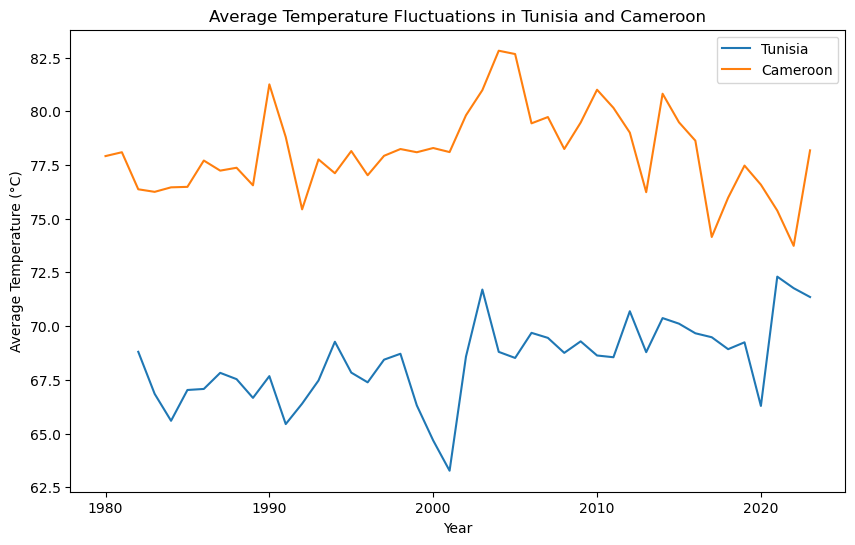

In [162]:
#Plot a line chart to show the average temperature fluctuations in Tunisia and Cameroon. Interpret the results.
import matplotlib.pyplot as plt

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(r"C:\Users\user\Desktop\Gomycode\cohort_7_python\Africa_climate_change.csv")

# Extract the date part from the 'DATE' column
df['DATE'] = df['DATE'].astype(str).str[:8]

# Convert the 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d', errors='coerce')

# Drop any rows with missing values
df = df.dropna()

# Extract the year from the 'DATE' column
df['YEAR'] = df['DATE'].dt.year

# Drop the 'DATE' column
df = df.drop('DATE', axis=1)

# Group the data by country and year, and calculate the mean temperature
df_grouped = df.groupby(['COUNTRY', 'YEAR'])['TAVG'].mean().reset_index()

# Pivot the data to create separate columns for each country
df_pivoted = df_grouped.pivot(index='YEAR', columns='COUNTRY', values='TAVG')

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(df_pivoted.index, df_pivoted['Tunisia'], label='Tunisia')
plt.plot(df_pivoted.index, df_pivoted['Cameroon'], label='Cameroon')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature Fluctuations in Tunisia and Cameroon')
plt.legend()
plt.show()


"""The line chart shows the average temperature fluctuations in Tunisia and Cameroon over the years.The following trends can be observed:

- Both countries experience a similar temperature trend, with a slight increase in temperature over the years.
- Tunisia's average temperature is generally higher than Cameroon's, which is expected given their geographical locations.
- There are some fluctuations in the temperature trend, which could be due to various factors such as climate change, weather patterns, or data quality issues.

Overall, the chart provides a useful visualization of the average temperature trends in Tunisia and Cameroon, which can be used to inform climate-related decisions or research

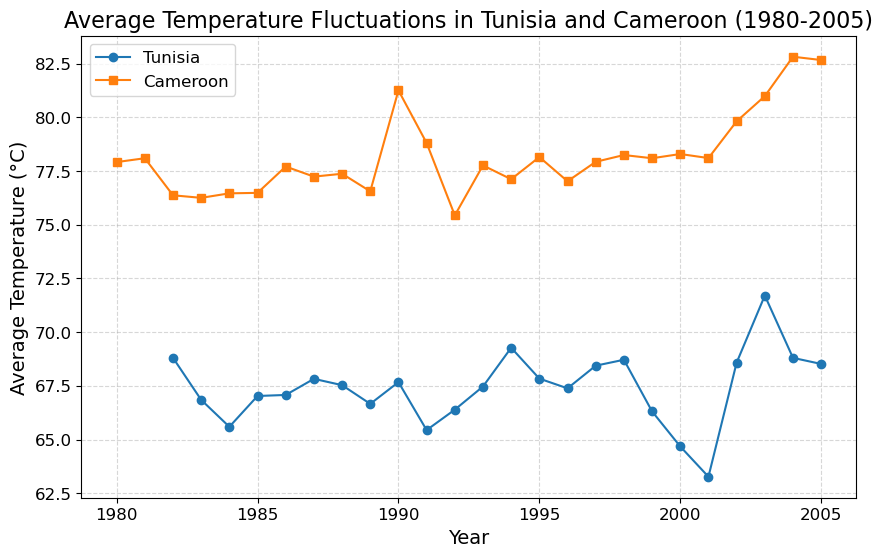

In [172]:
# Load the dataset into a Pandas DataFrame
#Zoom in to only include data between 1980 and 2005, try to customize the axes labels.
df = pd.read_csv(r"C:\Users\user\Desktop\Gomycode\cohort_7_python\Africa_climate_change.csv")
# Extract the date part from the 'DATE' column
df['DATE'] = df['DATE'].astype(str).str[:8]

# Convert the 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d', errors='coerce')

# Drop any rows with missing values
df = df.dropna()

# Extract the year from the 'DATE' column
df['YEAR'] = df['DATE'].dt.year

# Drop the 'DATE' column
df = df.drop('DATE', axis=1)

# Filter the data to include only years between 1980 and 2005
df_filtered = df[(df['YEAR'] >= 1980) & (df['YEAR'] <= 2005)]

# Group the data by country and year, and calculate the mean temperature
df_grouped = df_filtered.groupby(['COUNTRY', 'YEAR'])['TAVG'].mean().reset_index()

# Pivot the data to create separate columns for each country
df_pivoted = df_grouped.pivot(index='YEAR', columns='COUNTRY', values='TAVG')

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(df_pivoted.index, df_pivoted['Tunisia'], label='Tunisia', marker='o')
plt.plot(df_pivoted.index, df_pivoted['Cameroon'], label='Cameroon', marker='s')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Temperature (°C)', fontsize=14)
plt.title('Average Temperature Fluctuations in Tunisia and Cameroon (1980-2005)', fontsize=16)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

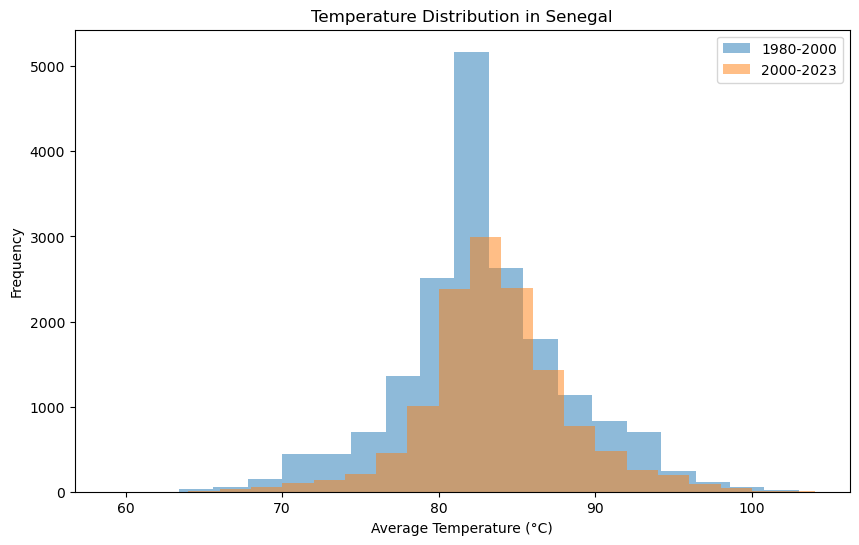

In [176]:
#Create Histograms to show temperature distribution in Senegal between [1980,2000] and [2000,2023] (in the same figure). Describe the obtained result
# Extract the date part from the 'DATE' column

df = pd.read_csv(r"C:\Users\user\Desktop\Gomycode\cohort_7_python\Africa_climate_change.csv")
df['DATE'] = df['DATE'].astype(str).str[:8]

# Convert the 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d', errors='coerce')

# Drop any rows with missing values
df = df.dropna()

# Extract the year from the 'DATE' column
df['YEAR'] = df['DATE'].dt.year

# Drop the 'DATE' column
df = df.drop('DATE', axis=1)

# Filter the data to include only Senegal
df_senegal = df[df['COUNTRY'] == 'Senegal']

# Filter the data into two time periods
df_1980_2000 = df_senegal[(df_senegal['YEAR'] >= 1980) & (df_senegal['YEAR'] <= 2000)]
df_2000_2023 = df_senegal[(df_senegal['YEAR'] >= 2000) & (df_senegal['YEAR'] <= 2023)]

# Create histograms
plt.figure(figsize=(10, 6))
plt.hist(df_1980_2000['TAVG'], bins=20, alpha=0.5, label='1980-2000')
plt.hist(df_2000_2023['TAVG'], bins=20, alpha=0.5, label='2000-2023')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution in Senegal')
plt.legend()
plt.show()


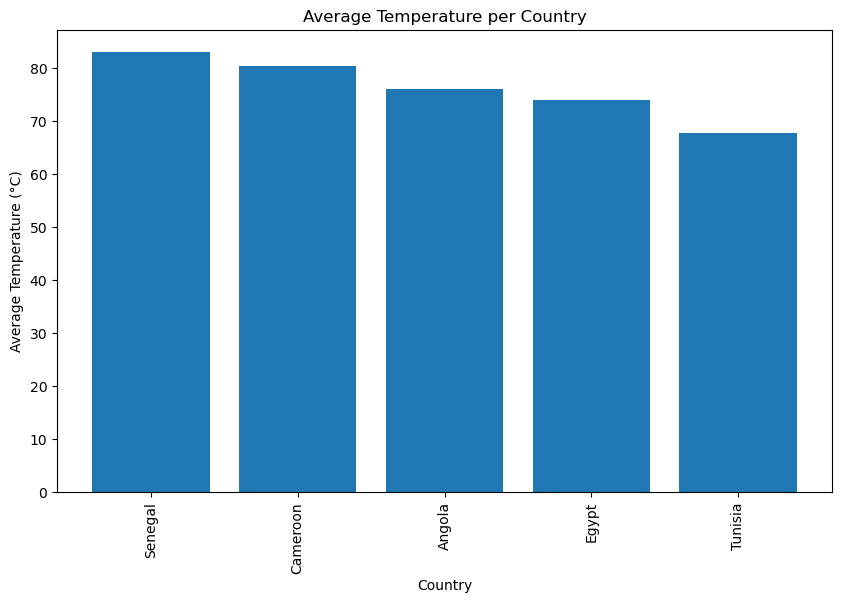

In [178]:
#Select the best chart to show the Average temperature per country

df = pd.read_csv(r"C:\Users\user\Desktop\Gomycode\cohort_7_python\Africa_climate_change.csv")
# Group the data by country and calculate the mean temperature
df_grouped = df.groupby('COUNTRY')['TAVG'].mean().reset_index()

# Sort the data in descending order
df_grouped = df_grouped.sort_values('TAVG', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_grouped['COUNTRY'], df_grouped['TAVG'])
plt.xlabel('Country')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature per Country')
plt.xticks(rotation=90)
plt.show()


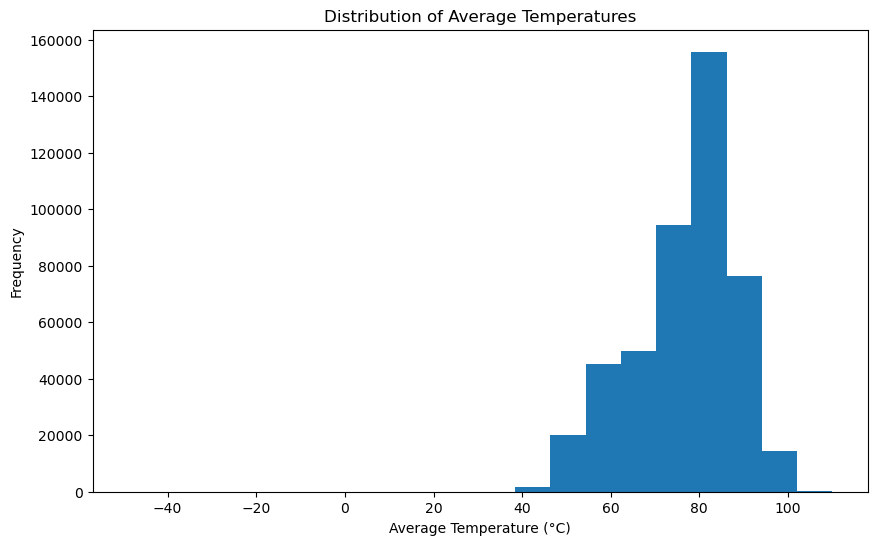

In [182]:
#Make your own questions about the dataset and try to answer them using the appropriate visuals.

## Question 1: What is the distribution of average temperatures in the dataset?

#Answer 

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(r"C:\Users\user\Desktop\Gomycode\cohort_7_python\Africa_climate_change.csv")

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['TAVG'], bins=20)
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Average Temperatures')
plt.show()


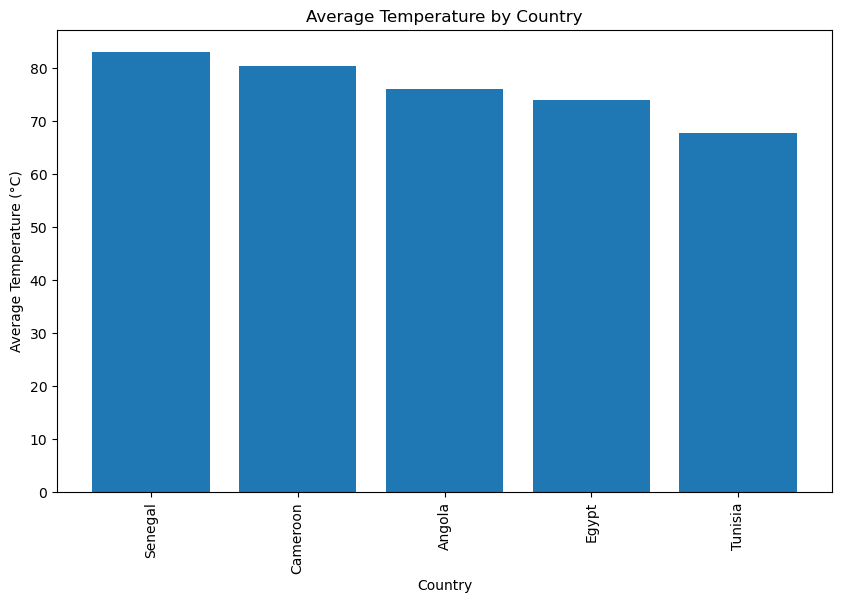

In [184]:
#Question 2: Country with the highest average temperature?

# Group the data by country and calculate the mean temperature
df_grouped = df.groupby('COUNTRY')['TAVG'].mean().reset_index()

# Sort the data in descending order
df_grouped = df_grouped.sort_values('TAVG', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_grouped['COUNTRY'], df_grouped['TAVG'])
plt.xlabel('Country')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature by Country')
plt.xticks(rotation=90)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_3032\3321346455.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['COUNTRY'] == 'Tunisia']['TAVG'],


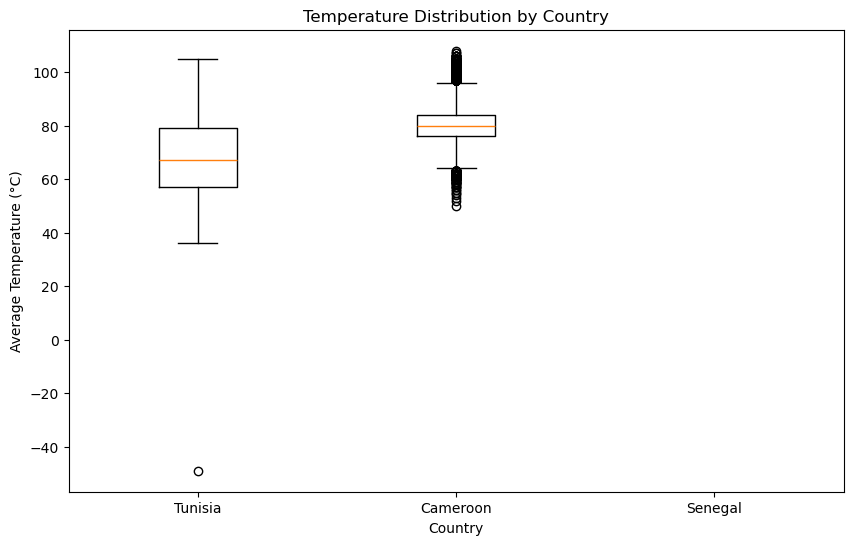

In [196]:
#Question 4: Which country has the most extreme temperature fluctuations?

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['COUNTRY'] == 'Tunisia']['TAVG'],
              df[df['COUNTRY'] == 'Cameroon']['TAVG'],
              df[df['COUNTRY'] == 'Senegal']['TAVG']],
             labels=['Tunisia', 'Cameroon', 'Senegal'])
plt.xlabel('Country')
plt.ylabel('Average Temperature (°C)')
plt.title('Temperature Distribution by Country')
plt.show()
